# Mall Customers – SOM ile Kümeleme
Bu not defteri, Kaggle'daki [Mall Customers](https://www.kaggle.com/shwetabh123/mall-customers) veri setini kullanarak, **SimpSOM** kütüphanesiyle bir **Kendini Düzenleyen Harita (SOM)** oluşturur ve ardından **K-Means** ile kümeler.

## Adımlar
1. Kütüphanelerin yüklenmesi
2. Veri setinin okunması ve ön işleme
3. SOM ağının oluşturulması ve eğitimi
4. 2D projeksiyon ve K-Means ile kümeleme
5. Sonuçların yorumlanması

> Not: Aşağıdaki kod, **eski** SimpSOM sürümüne göredir (`pip install SimpSOM`). Eğer **yeni** sürümü (GitHub) kurduysanız, `somNet()` yerine `spsom.somNet(...)` değişiklikleri gerekebilir.

In [11]:
# 1) Kütüphanelerin Yüklenmesi
# !pip install SimpSOM
# !pip install pandas numpy scikit-learn

import pandas as pd
import simpsom as sps
from sklearn.cluster import KMeans
import numpy as np

print("Kütüphaneler yüklendi.")

Kütüphaneler yüklendi.


## 2) Veri Setinin Okunması ve Ön İşlemler
[Kaggle sayfasından](https://www.kaggle.com/shwetabh123/mall-customers) indirdiğiniz `Mall_Customers.csv` dosyasını bu `.ipynb` ile aynı dizinde tutun.

Veri setinde tipik olarak şu sütunlar bulunur:
- **CustomerID**
- **Gender**
- **Age**
- **Annual Income (k$)**
- **Spending Score (1-100)**

Bu örnekte sadece **Age**, **Annual Income**, ve **Spending Score** sütunlarını modele dahil edeceğiz.

In [12]:
df = pd.read_csv("Mall_Customers.csv")  # Aynı klasörde olduğunu varsayıyoruz
print("Veri seti boyutu:", df.shape)
df.head()

Veri seti boyutu: (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Gerekli Sütunların Seçilmesi
Sadece sayısal sütunları alacağız. `Gender` metinsel olduğu için, isterseniz **LabelEncoder** veya **One-Hot** ile dönüştürebilirsiniz. Bu örnekte basitlik adına onu çıkartıyoruz.

In [13]:
# Gerekli sütunları alalım
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].copy()
print("Seçilen sütunlar:", X.columns.tolist())
X.head()

Seçilen sütunlar: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## 3) SOM Ağının Oluşturulması ve Eğitimi
Burada 20×20 boyutunda bir harita oluşturuyor ve veriyi **X.values** (NumPy) olarak veriyoruz.

> `net.train(0.01, 10000)` çağrısında ilk parametre öğrenme katsayısı, ikinci parametre epok sayısıdır. 10.000 epok, veri seti küçük olduğu için uzun sürebilir; isterseniz düşürebilirsiniz (ör. 1.000).

In [16]:
net = sps.SOMNet(
    20,  # en
    20,  # boy
    X.values,  # NumPy array
    PBC=True   # Periyodik sınır koşulları
)

print("SOM ağı oluşturuldu.")

# Ağı eğitelim (2000 epok, öğrenme katsayısı 0.01)
net.train(train_algo='batch', epochs=2000, start_learning_rate=0.01)
print("SOM eğitimi tamamlandı.")

Periodic Boundary Conditions active.
The weights will be initialized with PCA.
SOM ağı oluşturuldu.
The map will be trained with the batch algorithm.
Training SOM... done!
SOM eğitimi tamamlandı.


## 4) 2D Projeksiyon ve K-Means ile 3 Kümeye Ayırma
SOM ile eğitilen verileri 2 boyutlu bir haritaya yansıtıp, `KMeans` (örneğin 3 kümeli) ile sınıflandıracağız.

> `net.project(X.values)` -> her satıra 2 boyutlu bir koordinat veriyor. Bunu NumPy dizisine çevirip `kmeans.fit_predict()` ile etiketleri alabiliriz.

In [17]:
coords = np.array(net.project(X.values))  # 2 boyutlu koordinatlar
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(coords)

print("Küme etiketleri:", labels[:20], "...")
print("Toplam örnek sayısı:", len(labels))

Küme etiketleri: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] ...
Toplam örnek sayısı: 200


/Users/atakanemre/.pyenv/versions/3.11.0/lib/python3.11/site-packages/simpsom/network.py:629: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter([pos[0]-0.125+random.random()*0.25 for pos in bmu_list],


<Figure size 640x480 with 0 Axes>

## 5) Sonuçların Yorumlanması
Artık her müşteriye (satıra) bir küme etiketi ekleyerek, hangi müşterilerin birlikte gruplandığına bakabilirsiniz. Aşağıdaki gibi DataFrame'e ekleyebiliriz.

In [18]:
df['Cluster'] = labels
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
5,6,Female,22,17,76,2
6,7,Female,35,18,6,2
7,8,Female,23,18,94,2
8,9,Male,64,19,3,2
9,10,Female,30,19,72,2


/Users/atakanemre/.pyenv/versions/3.11.0/lib/python3.11/site-packages/simpsom/network.py:629: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter([pos[0]-0.125+random.random()*0.25 for pos in bmu_list],


<Figure size 640x480 with 0 Axes>

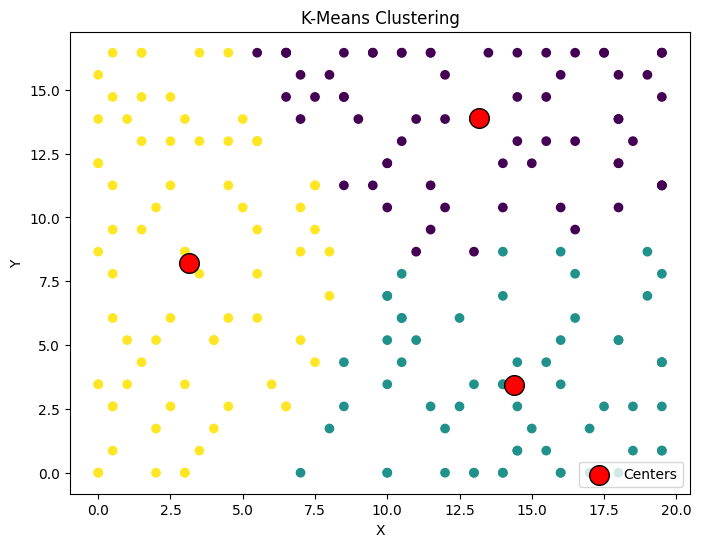

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# net.project(X.values) -> 2 boyutlu koordinatların listesi 
map_coords = np.array(net.project(X.values))  
labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure(figsize=(8,6))
plt.scatter(
    map_coords[:, 0], 
    map_coords[:, 1], 
    c=labels, 
    cmap='viridis'
)
plt.scatter(
    centers[:, 0], 
    centers[:, 1],
    marker='o', 
    s=200, 
    c='red', 
    edgecolor='k', 
    label='Centers'
)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

Kümelerin karakteristiklerini istatistiksel olarak (ör. yaş ortalaması, gelir ortalaması) inceleyerek "en yüksek harcamaya sahip grup", "orta seviye" vb. analizler yapabilirsiniz.

